In [ ]:
#install
%pip install -q ultralytics

In [ ]:
%cd /content/drive/MyDrive/Deep learning/Fire detection
#unzip data
!unzip  "/content/drive/MyDrive/Deep learning/Fire detection/continuous_fire.v6-original_raw-images.yolov8.zip"

In [1]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/teamspace/studios/this_studio/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# train with custom data
!yolo task= detect mode= train model= yolov8s.pt data="/content/drive/MyDrive/Deep learning/Fire detection/data.yaml" epochs= 50 imgsz=640

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Deep learning/Fire detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [44]:
#predict
model = YOLO( "/content/drive/MyDrive/Deep learning/Fire detection/runs/detect/train2/weights/best.pt" )

if __name__ == "__main__":
   result = model.predict( source= "/content/image (259).png" , save=True , imgsz = 640 , conf=0.6 )


image 1/1 /content/image (259).png: 480x640 2 fires, 485.4ms
Speed: 3.0ms preprocess, 485.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict8


In [48]:
img = result[ 0 ].orig_img
result[ 0 ].boxes.data

tensor([[3.4007e+02, 1.7304e+02, 7.0963e+02, 4.1695e+02, 7.1812e-01, 0.0000e+00],
        [6.1806e+02, 2.4976e+02, 7.0227e+02, 3.7869e+02, 6.2444e-01, 0.0000e+00]])

In [61]:
import cv2
import numpy as np
from PIL import Image
from ultralytics.utils.plotting import Annotator

# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)

for r in result:
  annotator = Annotator(im_pil)
  boxes = r.boxes
  for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

im_pil = annotator.result()

array([[[ 93,  84,  77],
        [103,  94,  87],
        [114, 105, 100],
        ...,
        [ 69,  81,  93],
        [ 71,  83,  95],
        [ 71,  83,  95]],

       [[103,  93,  84],
        [108,  99,  90],
        [116, 105,  99],
        ...,
        [ 71,  83,  95],
        [ 72,  84,  96],
        [ 72,  84,  96]],

       [[120, 108,  94],
        [119, 110,  95],
        [123, 111,  99],
        ...,
        [ 75,  85,  97],
        [ 74,  86,  98],
        [ 72,  84,  96]],

       ...,

       [[107,  93,  32],
        [ 93,  78,  21],
        [ 96,  80,  31],
        ...,
        [124, 102,  52],
        [146, 126,  65],
        [163, 144,  76]],

       [[ 98,  85,  15],
        [ 98,  84,  19],
        [111,  96,  37],
        ...,
        [118,  96,  46],
        [122, 102,  39],
        [129, 110,  41]],

       [[ 85,  71,   0],
        [101,  87,  14],
        [119, 104,  37],
        ...,
        [120,  99,  46],
        [112,  93,  27],
        [116,  98,  26]]], dtype=uint8)
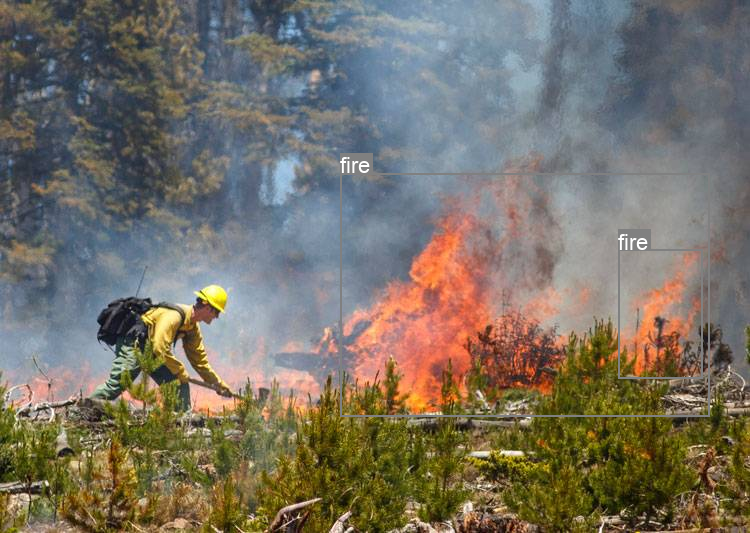

In [62]:
# show result
im_pil

In [3]:
#predict
model = YOLO( "/teamspace/studios/this_studio/FireEye-Smart-System/model/yolov10m/weights/best.pt" )

if __name__ == "__main__":
   result = model.predict( source= "/teamspace/studios/this_studio/FireEye-Smart-System/data/test_image_2.jpg" , save=True , imgsz = 640 , conf=0.6 )


image 1/1 /teamspace/studios/this_studio/FireEye-Smart-System/data/test_image_2.jpg: 640x640 2 fires, 451.1ms
Speed: 1.9ms preprocess, 451.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [4]:
img = result[ 0 ].orig_img
result[ 0 ].boxes.data

tensor([[128.9743,  37.2638, 224.0000, 164.1561,   0.7307,   0.0000],
        [ 69.7203,  33.0597, 144.4069, 105.9989,   0.6038,   0.0000]])

In [5]:
import cv2
import numpy as np
from PIL import Image
from ultralytics.utils.plotting import Annotator

# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)

for r in result:
  annotator = Annotator(im_pil)
  boxes = r.boxes
  for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

im_pil = annotator.result()

100%|██████████| 755k/755k [00:00<00:00, 53.3MB/s]


(-0.5, 223.5, 223.5, -0.5)

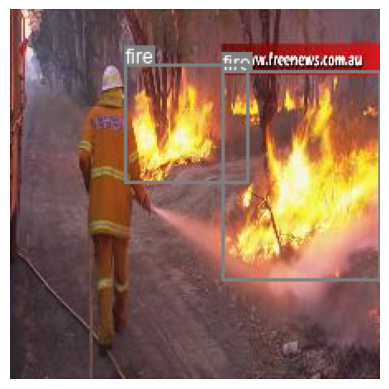

In [10]:
import matplotlib.pyplot as plt
# show result
plt.imshow(im_pil)
plt.axis('off')